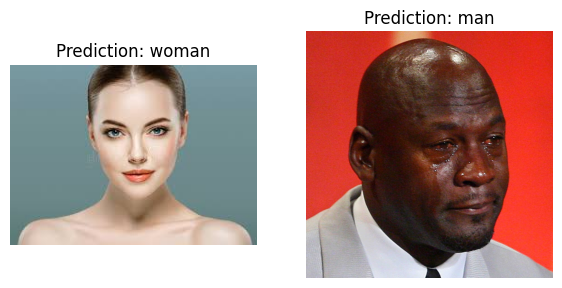

In [11]:
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
import torchvision
import numpy as np
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

images = datasets.ImageFolder(root='C:/Users/Anyone/Desktop/GenderClassification', transform=transform)

idx_to_class = {v: k for k, v in images.class_to_idx.items()}

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(64 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 2)

        self.relu = nn.ReLU()
        
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):

        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 16 * 16)
        
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

model = Net().to(device)

model.load_state_dict(torch.load('C:/Users/Anyone/Desktop/GenClassLargerSaves/GenClassLargerSaves_3_49.pth'))

img1 = Image.open('C:/Users/Anyone/Downloads/12.jpg')
img2 = Image.open('C:/Users/Anyone/Downloads/13.jpg')

img_tensor1 = transform(img1).unsqueeze(0).to(device)
img_tensor2 = transform(img2).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output1 = model(img_tensor1)
    output2 = model(img_tensor2)

_, predicted1 = torch.max(output1.data, 1)
_, predicted2 = torch.max(output2.data, 1)

fig, axs = plt.subplots(1, 2, figsize=(7,7))

axs[0].imshow(img1)
axs[0].set_title(f'Prediction: {idx_to_class[predicted1.item()]}')
axs[0].axis('off')

axs[1].imshow(img2)
axs[1].set_title(f'Prediction: {idx_to_class[predicted2.item()]}')
axs[1].axis('off')

plt.show()